### Python Coding Assessment: Equity Pair Trading Backtester

Task 5:

Provide a simple interactive solution for quick experimentation of a given pair strategy with a range of parameter choices. This is probably easiest to do with a Jupyter notebook and Streamlit, but Dash/Holoviz Panel/etc also work fine.

In [276]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import yfinance as yf

from utils.ts_methods import backtest_pairs_trading

The code below calls in price data saved in local directory. However, this step can be skipped or modified to pull a different dataframe containing price series of stocks.

In [277]:
stock_data = pd.read_csv('stock_data.csv', index_col=0)
index_data = pd.read_csv('index_data.csv', index_col=0)

# concat the index series at the end of single stock data
stock_data = pd.concat([stock_data, index_data], axis=1)

# drop empty columns
stock_data = stock_data.dropna(axis=1, how='all')

# drop if any of the most recent month's data is missing
last_month = stock_data.tail(22)
missing_columns = last_month.columns[last_month.isnull().any()]
stock_data = stock_data.drop(missing_columns, axis=1)

# drop if more than 5% of the data is missing oveer the past 3 years
three_years_ago = datetime.date.today() - datetime.timedelta(days = 3*252)
stock_data_past_3_years = stock_data[pd.to_datetime(stock_data.index).date 
                                     >= three_years_ago]
missing_percentage = (stock_data_past_3_years.isnull().sum() /
                       len(stock_data_past_3_years))
columns_to_drop = missing_percentage[missing_percentage > .05].index
stock_data = stock_data.drop(columns_to_drop, axis=1)

# convert index from datetime to date (helps with plotting)
stock_data.index = pd.to_datetime(stock_data.index).date

test_data = stock_data.iloc[-252:, -100:]

The function backtest_pairs_trading(...) can be used backtest a pairs trading strategy. Make sure to check the documentation for the function (tldr: have a clean dataframe of prices and pick a pair using a tuple(s) of column names)

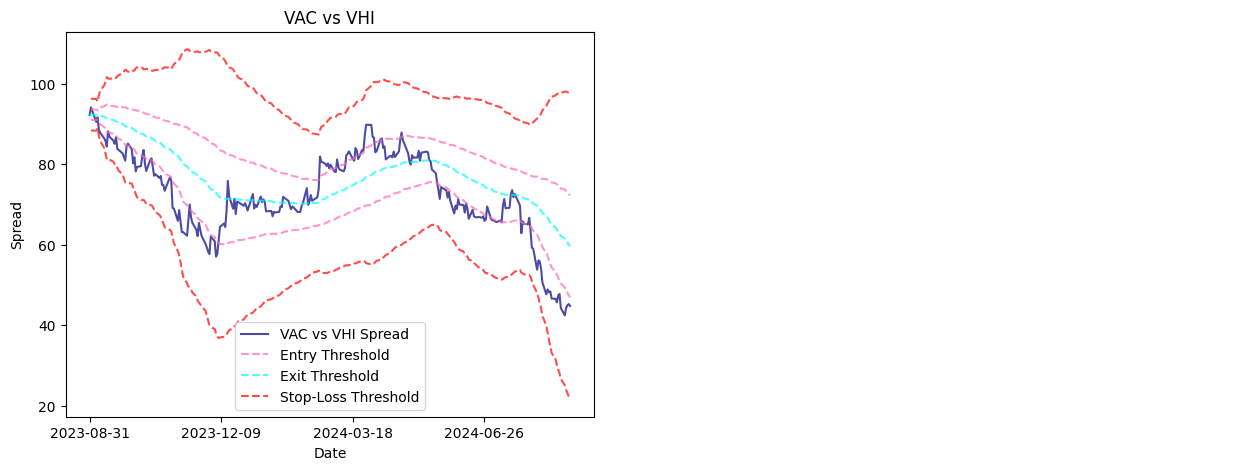

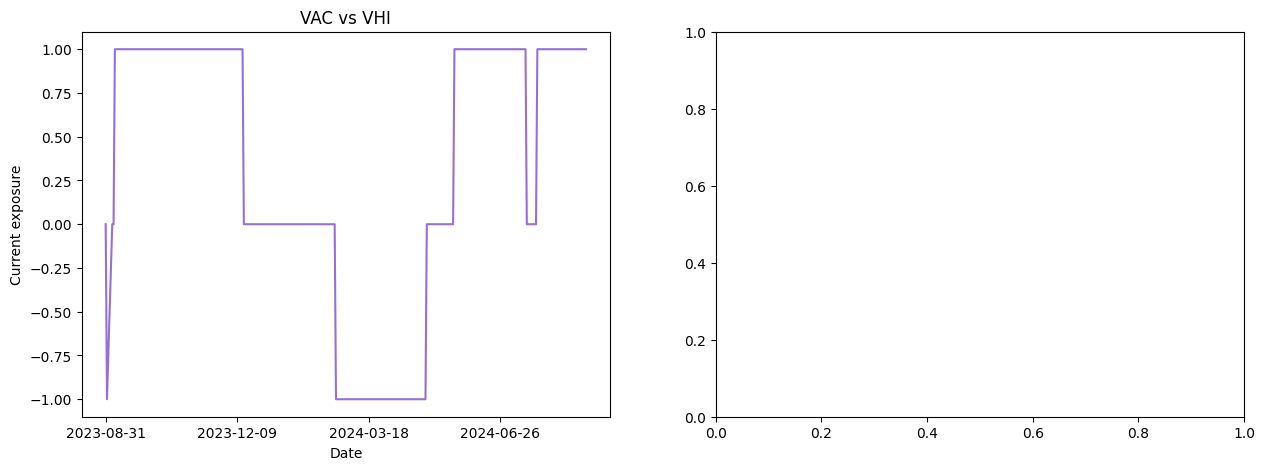

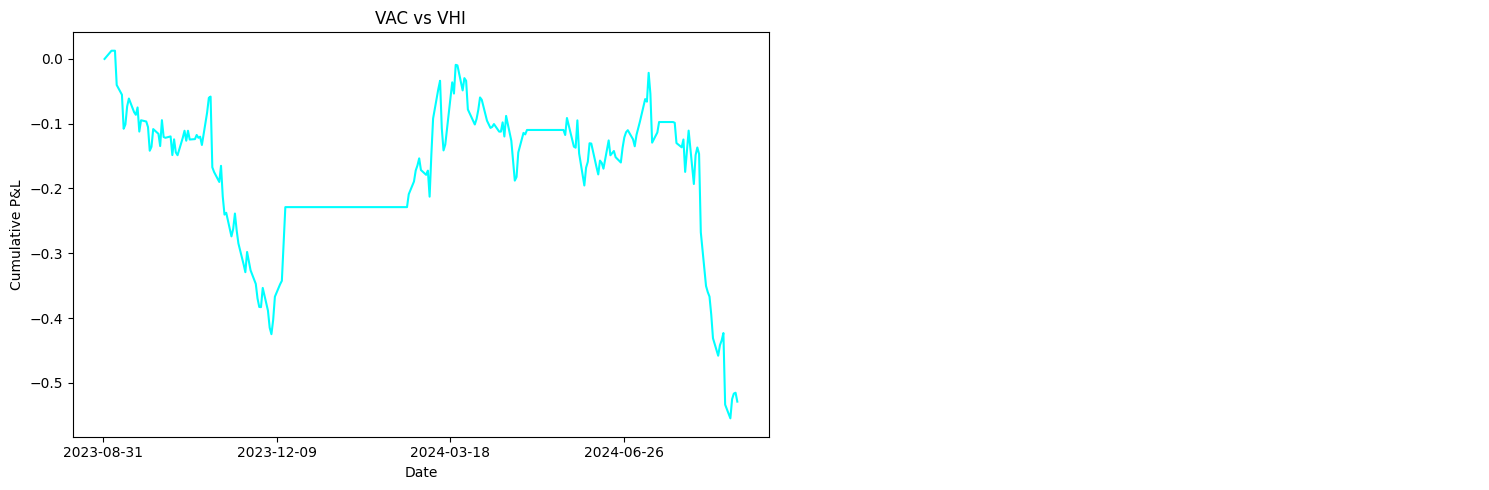

         Total Return  Annualized Return  Annualized Volatility  \
VAC VHI     -0.529121          -0.457042               0.530985   

         Information Ratio  
VAC VHI          -0.860744  


In [281]:
results_test, series_test = backtest_pairs_trading(test_data, ('VAC', 'VHI'), 
                                                   window=63, entry_threshold=1,
                                                   exit_threshold=0, 
                                                   stoploss_threshold=3,
                                                   smoothing='ema')

print(results_test)